In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
Default = pd.read_csv("attachment_default.csv")

In [3]:
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [4]:
Default.shape

(10000, 4)

In [5]:
Default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


<AxesSubplot:ylabel='income'>

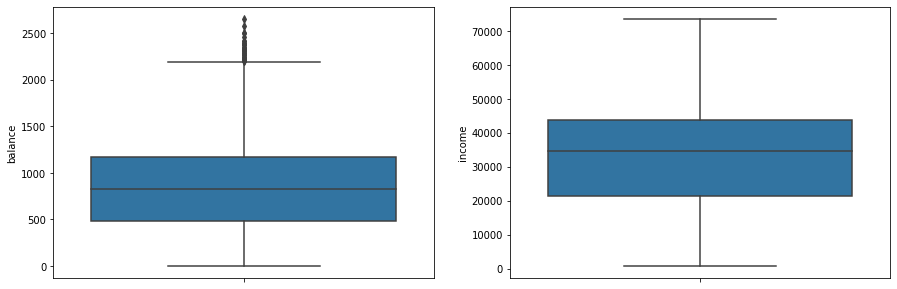

In [6]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(y=Default["balance"])

plt.subplot(1,2,2)
sns.boxplot(y=Default["income"])

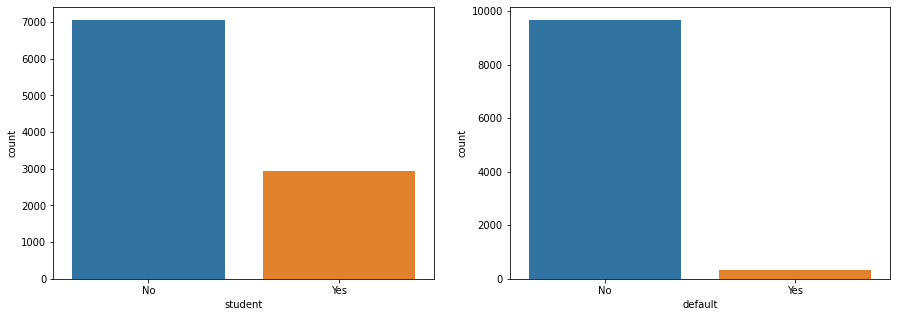

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(Default['student'])
plt.subplot(1,2,2)
sns.countplot(Default['default'])
plt.show()


In [8]:
Default['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [9]:
Default['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [10]:
Default['student'].value_counts(normalize=True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [11]:
Default['default'].value_counts(normalize=True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

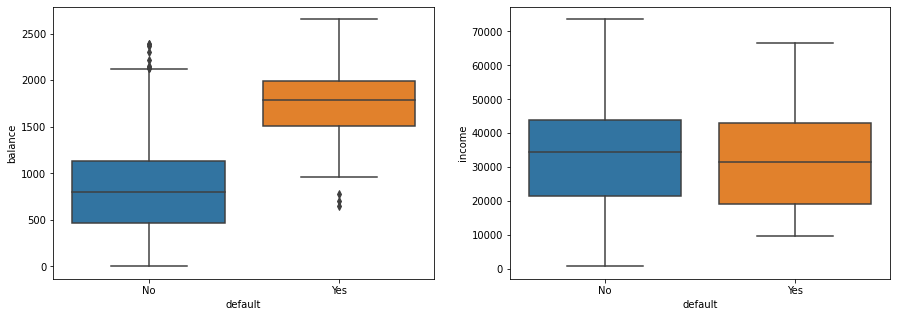

In [12]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(Default['default'],Default['balance'])

plt.subplot(1,2,2)
sns.boxplot(Default['default'],Default['income'])
plt.show()

In [13]:
pd.crosstab(Default['student'],Default['default'],normalize = 'index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


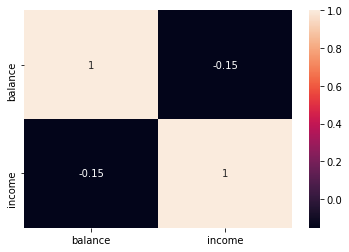

In [14]:
sns.heatmap(Default[['balance','income']].corr(),annot = True)
plt.show()

In [15]:
Q1,Q3 = Default['balance'].quantile([.25,.75])
IQR = Q3 - Q1
LL = Q1-1.5*(IQR)
UL = Q3+1.5*(IQR) 

In [16]:
UL

2193.174308607817

In [17]:
df = Default[Default['balance']>UL]

In [18]:
df

,default,student,balance,income
173,Yes,Yes,2205.799521,14271.492253
1136,Yes,No,2499.016750,51504.293960
1160,Yes,Yes,2502.684931,14947.519752
1359,Yes,No,2220.966201,40725.096207
1502,Yes,Yes,2332.878254,11770.234124
1609,Yes,Yes,2269.946966,18021.105948
2096,Yes,Yes,2261.848162,20030.165119
2140,No,Yes,2308.893236,19110.266412
2929,Yes,Yes,2387.314867,28296.914718
3162,Yes,Yes,2415.316994,17429.503375


In [19]:
df['default'].count()

31

In [20]:
df['default'].value_counts(normalize = True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [21]:
df['default'].value_counts()

Yes    26
No      5
Name: default, dtype: int64

In [56]:
Default['balance']=np.where(Default['balance']>UL,UL,Default['balance'])

In [54]:
Default['balance']

0        729.526495
1        817.180407
2       1073.549164
3        529.250605
4        785.655883
           ...     
9995     711.555020
9996     757.962918
9997     845.411989
9998    1569.009053
9999     200.922183
Name: balance, Length: 10000, dtype: float64

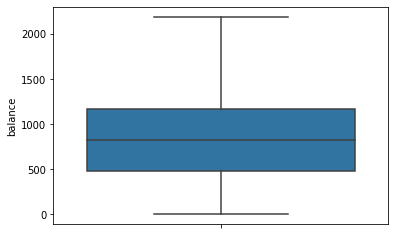

In [23]:
sns.boxplot(y=Default["balance"])
plt.show()

In [24]:
Default=pd.get_dummies(Default,drop_first = True)

In [25]:
Default.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [26]:
Default.columns = ['balance','income','default','student']

In [27]:
Default.head()

,balance,income,default,student
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [28]:
from sklearn.model_selection import train_test_split

In [30]:
x = Default.drop('default', axis = 1)
y = Default['default']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21,stratify=y)

In [32]:
print(x_train.shape)
print(x_test.shape)

(7000, 3)
(3000, 3)


In [33]:
print(y_train.value_counts(normalize=True).round(2))
print('')
print(y_test.value_counts(normalize=True).round(2))

0    0.97
1    0.03
Name: default, dtype: float64

0    0.97
1    0.03
Name: default, dtype: float64


In [35]:
''''from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33,sampling_startegy=0.75)
x_res,y_res = sm.fit_sample(x_train,y_train)'''

"'from imblearn.over_sampling import SMOTE\nsm = SMOTE(random_state=33,sampling_startegy=0.75)\nx_res,y_res = sm.fit_sample(x_train,y_train)"

In [38]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression()

In [42]:
lr

LogisticRegression()

In [43]:
lr.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_pred=lr.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
confusion_matrix(y_test,y_pred)

array([[2889,   11],
       [  66,   34]], dtype=int64)

In [57]:
(2889+66)/(2889+34+11+66)

0.985